Name: M M Satya Sai Varma

OASIS INTERNSHIP TASK-3 

#  EMAIL SPAM DETECTION

We have all been the recipient of spam mails before. Spam mail,or junk mail, is a type of email that is sent to a massive number of users at one time, frequently containing cryptic messages, scams ,or most dangerously, phishing content. In this project , we use Python to build an email spam detector. Then use machine learning to train the spam detector to recognize and classify emails into spam and non-spam.

**Modules needed:

pandas: Pandas is an opensource library that allows you to perform data manipulation in Python. Pandas provide an easy way to create, manipulate and wrangle the data.

numpy: Numpy is the fundamental package for scientific computing with Python. numpy can be used as an efficient multi-dimensional container of generic data.

matplotlib: Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of formats.

seaborn: Seaborn is a Python data-visualization library that is based on matplotlib. Seaborn provides a high-level interface for drawing attractive and informative statistical graphics.

scipy: Scipy is a Python-based ecosystem of open-source software for mathematics, science, and engineering.

Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style="darkgrid",font_scale=1.5)

from wordcloud import WordCloud
from collections import Counter

from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix


Loading of dataset

In [2]:
df=pd.read_csv('C:/Users/satya/Downloads/spam.csv' , encoding = "ISO-8859-1")

Display Summary Statistics

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [6]:
df.tail(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5562,ham,Ok lor... Sony ericsson salesman... I ask shuh...,NaN,NaN,NaN
5563,ham,Ard 6 like dat lor.,NaN,NaN,NaN
5564,ham,Why don't you wait 'til at least wednesday to ...,NaN,NaN,NaN
5565,ham,Huh y lei...,NaN,NaN,NaN
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,NaN,NaN,NaN
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [7]:
df.dtypes.to_frame().rename(columns={0:"Data-Types"})

,Data-Types
v1,object
v2,object
Unnamed: 2,object
Unnamed: 3,object
Unnamed: 4,object


In [8]:
null = df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
null["% of Missing Values"] = round(100*null["Total No. of Missing Values"]/len(df),2)
null

,Total No. of Missing Values,% of Missing Values
v1,0,0.00
v2,0,0.00
Unnamed: 2,5522,99.10
Unnamed: 3,5560,99.78
Unnamed: 4,5566,99.89


In [9]:
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [10]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df.rename(columns={"v1":"Detection","v2":"Email Message"},inplace=True)

In [12]:
df.head()

,Detection,Email Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.duplicated().sum()

403

In [14]:
df.drop_duplicates(inplace=True)

In [16]:
df.shape

(5169, 2)

In [17]:
df["Detection"].value_counts()

Detection
ham     4516
spam     653
Name: count, dtype: int64

Data Visualization

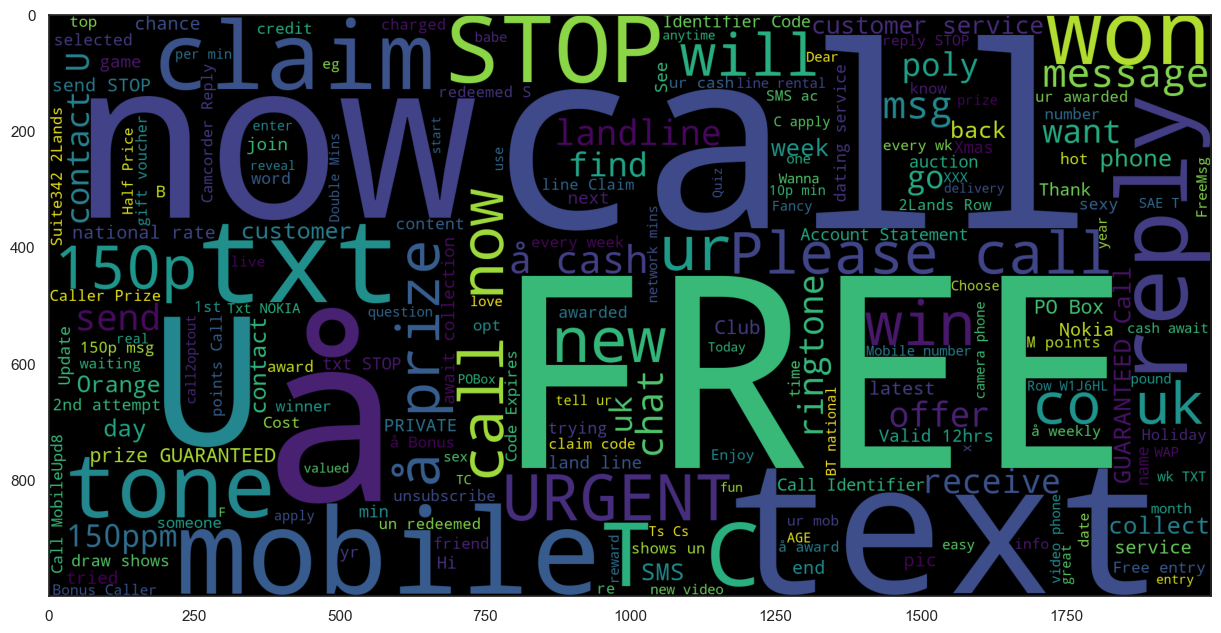

In [19]:
sns.set(style="white")
plt.figure(figsize=(15,15))
wc=WordCloud(width=2000,height=1000,background_color='black')

spam_wc=wc.generate(df[df['Detection']=='spam']['Email Message'].str.cat(sep=" "))
plt.imshow(spam_wc)
plt.show()

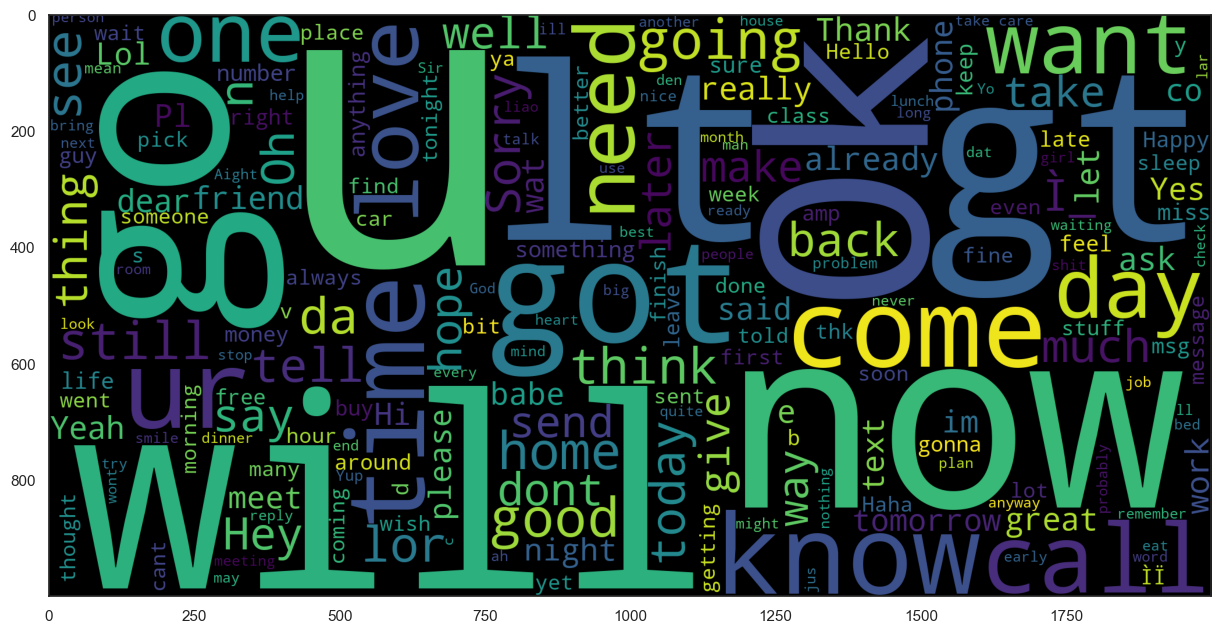

In [20]:
sns.set(style="white")
plt.figure(figsize=(15,15))
wc=WordCloud(width=2000,height=1000,background_color='black')

spam_wc=wc.generate(df[df['Detection']=='ham']['Email Message'].str.cat(sep=" "))
plt.imshow(spam_wc)
plt.show()


In [21]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\satya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
import string

from nltk.corpus import stopwords
nltk.download('stopwords')

from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\satya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
print(string.punctuation,"\n\n")

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ 




In [24]:
print(stopwords.words('english'))


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [25]:
def transform_sms(message):
    
    # to convert all characters in lower case
    message=message.lower()
    
    # to break sms record into words
    message=nltk.word_tokenize(message)
    
    # to remove special symbals
    temp=[]
    for i in message:
        if i.isalnum():
            temp.append(i)

    # creating clone of temp
    message=temp[:]   
    
    # clear the temp object
    temp.clear()
    
    # removing stopwords and punctuations
    for i in message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            temp.append(i)
    
    message=temp[:]
    temp.clear()
    
    # stemming
    for i in message:
        temp.append(ps.stem(i))
    
    
    return " ".join(temp)

In [26]:
df['Email Message']=df['Email Message'].apply(transform_sms)

In [27]:
df.head()

,Detection,Email Message
0,ham,go jurong point crazi avail bugi n great world...
1,ham,ok lar joke wif u oni
2,spam,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,u dun say earli hor u c alreadi say
4,ham,nah think goe usf live around though


In [28]:
df['Detection']=df['Detection'].map({'spam':1,'ham':0})

In [29]:
df['Detection'].unique()

array([0, 1], dtype=int64)

In [30]:
df.head()

,Detection,Email Message
0,0,go jurong point crazi avail bugi n great world...
1,0,ok lar joke wif u oni
2,1,free entri 2 wkli comp win fa cup final tkt 21...
3,0,u dun say earli hor u c alreadi say
4,0,nah think goe usf live around though


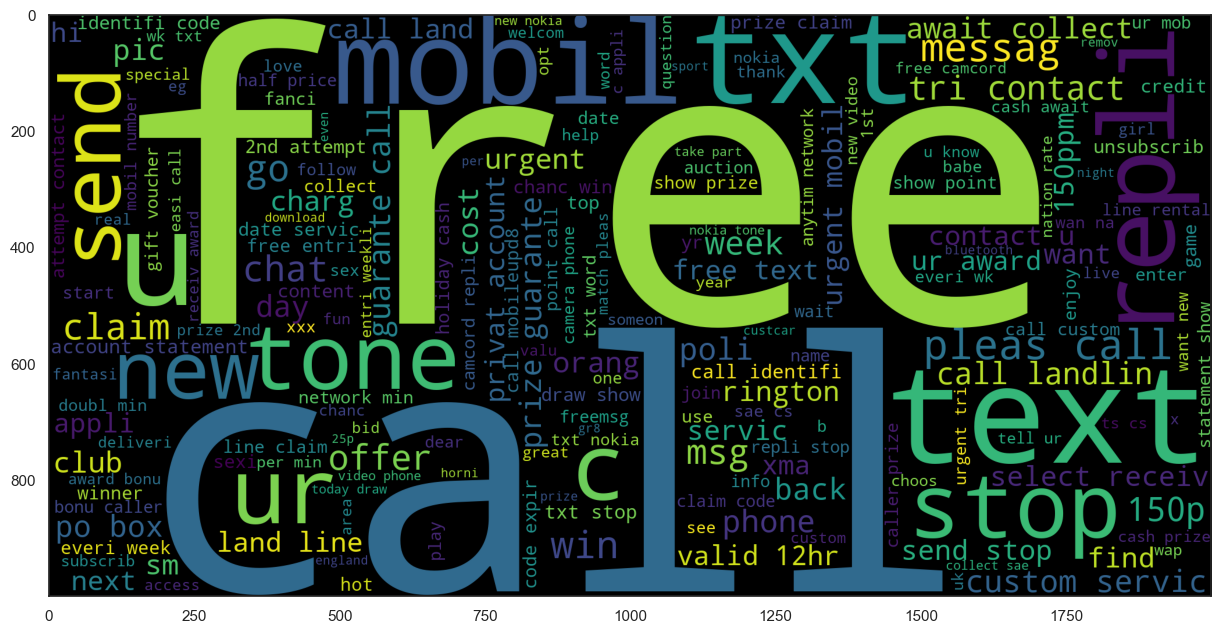

In [31]:
plt.figure(figsize=(15,15))
spam_wc=wc.generate(df[df['Detection']==1]['Email Message'].str.cat(sep=" "))
plt.imshow(spam_wc)
plt.show()

In [32]:
most_used_spam_words=[]

spam_list=df[df['Detection']==1]['Email Message'].tolist()

# accessing each individual elements from spam_list
for sentense in spam_list:
    # accessing each individual word form list elements
    for word in sentense.split():
        most_used_spam_words.append(word)


In [33]:
top_10=pd.DataFrame(Counter(most_used_spam_words).most_common(10))

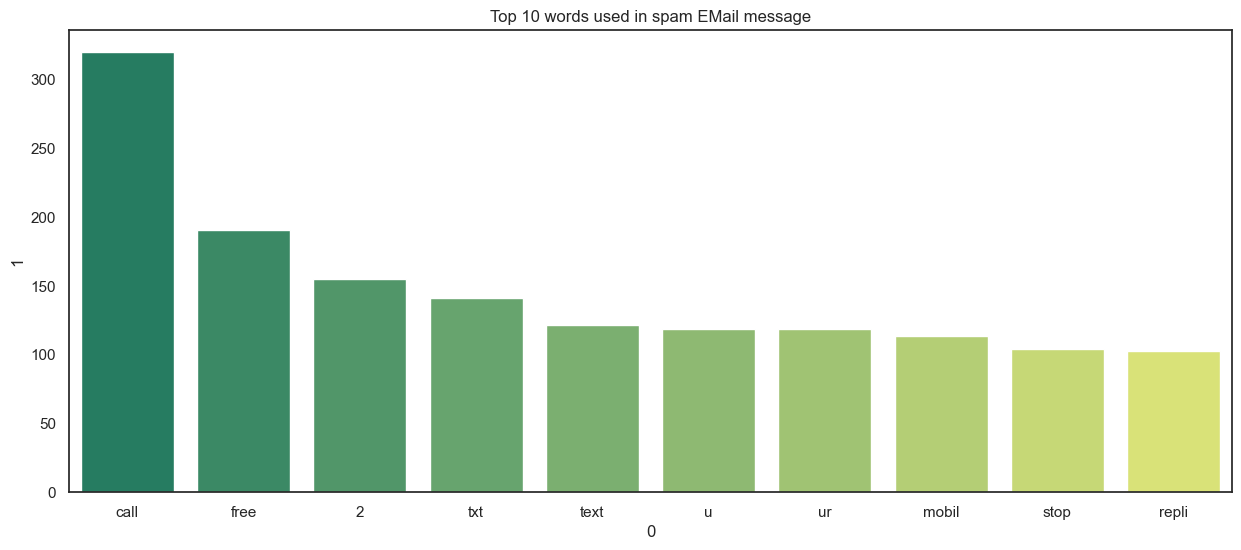

In [34]:
plt.figure(figsize=(15,6))
sns.barplot(x=top_10[0],y=top_10[1],palette="summer")
plt.title("Top 10 words used in spam EMail message")
plt.show()

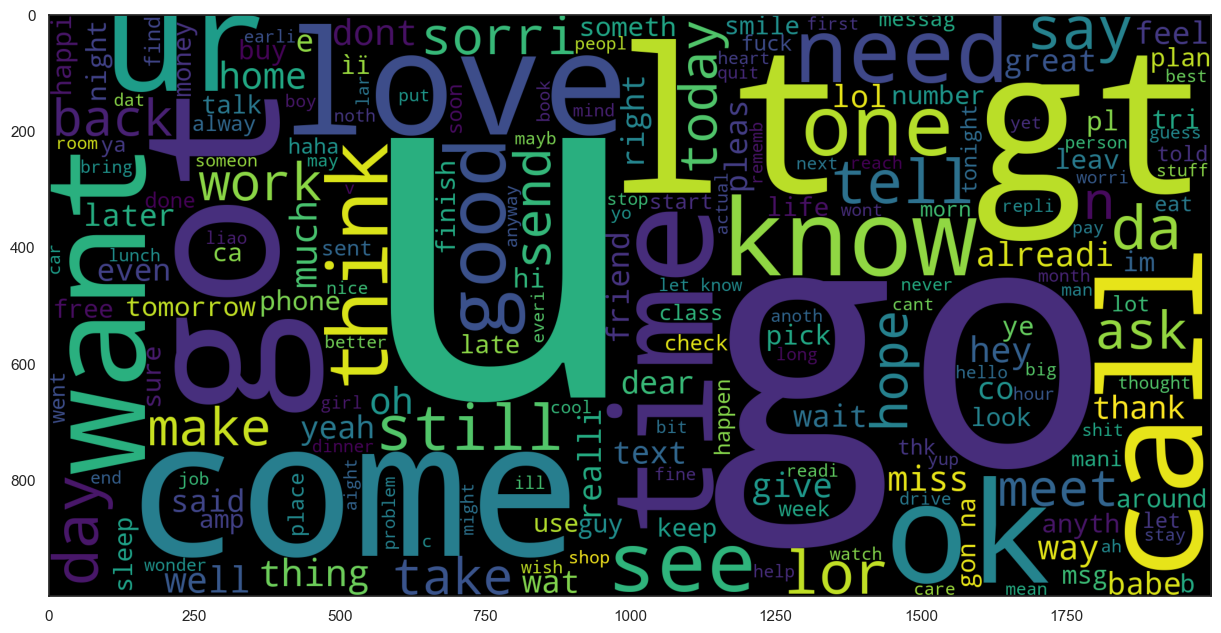

In [35]:
sns.set(style="white")
plt.figure(figsize=(15,15))
spam_wc=wc.generate(df[df['Detection']==0]['Email Message'].str.cat(sep=" "))
plt.imshow(spam_wc)
plt.show()

In [36]:
most_used_ham_words=[]

ham_list=df[df['Detection']==0]['Email Message'].tolist()

# accessing each individual elements from spam_list
for sentense in ham_list:
    # accessing each individual word form list elements
    for word in sentense.split():
        most_used_ham_words.append(word)


In [37]:
top_10_ham=pd.DataFrame(Counter(most_used_ham_words).most_common(10))

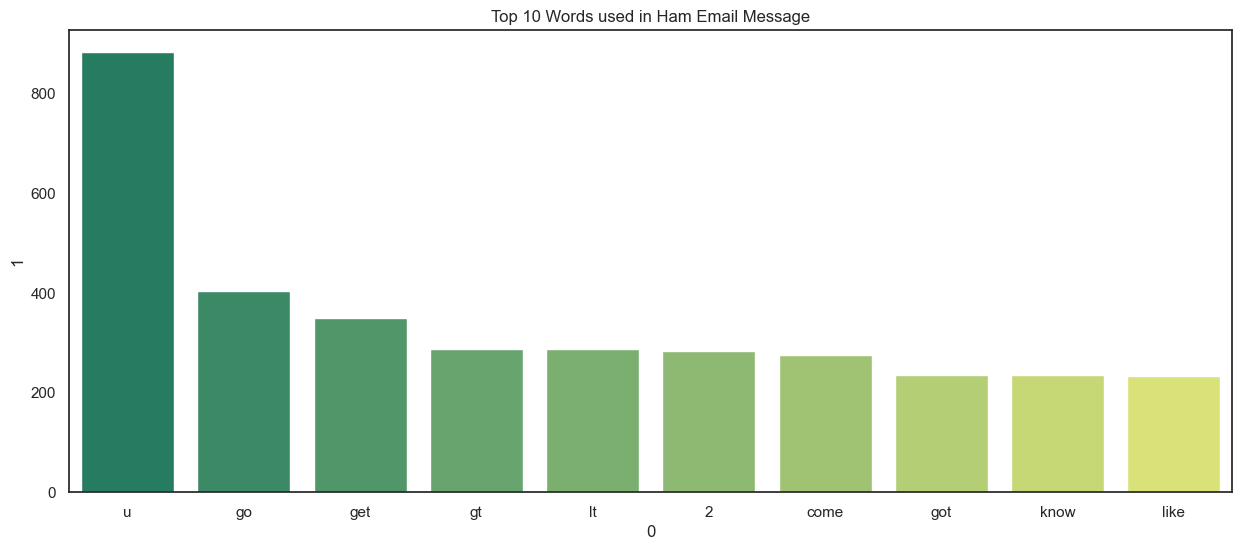

In [38]:
plt.figure(figsize=(15,6))
sns.barplot(x=top_10_ham[0],y=top_10_ham[1],palette="summer")
plt.title("Top 10 Words used in Ham Email Message")
plt.show()

Data Modelling And Prediction

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [40]:
tfidf=TfidfVectorizer()

In [41]:
# converting into vectors
x=tfidf.fit_transform(df['Email Message']).toarray()

In [42]:
x.shape

(5169, 6708)

In [43]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [44]:
y=df['Detection'].values

In [45]:
y.shape

(5169,)

In [46]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [48]:
print("x_train - >  ",x_train.shape)
print("x_test - >  ",x_test.shape)
print("y_train - >  ",y_train.shape)
print("y_test - >  ",y_test.shape)

x_train - >   (4135, 6708)
x_test - >   (1034, 6708)
y_train - >   (4135,)
y_test - >   (1034,)


In [49]:
training_score = []
testing_score = []

In [50]:
def model_prediction(model):
    model.fit(x_train,y_train)
    x_train_pred = model.predict(x_train)
    x_test_pred = model.predict(x_test)
    a = accuracy_score(y_train,x_train_pred)*100
    b = accuracy_score(y_test,x_test_pred)*100
    training_score.append(a)
    testing_score.append(b)
    
    print(f"Accuracy_Score of {model} model on Training Data is:",a)
    print(f"Accuracy_Score of {model} model on Testing Data is:",b)
    print("\n------------------------------------------------------------------------")
    print(f"Precision Score of {model} model is:",precision_score(y_test,x_test_pred))
    print(f"Recall Score of {model} model is:",recall_score(y_test,x_test_pred))
    print(f"F1 Score of {model} model is:",f1_score(y_test,x_test_pred))
    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model} model is:")
    cm = confusion_matrix(y_test,x_test_pred)
    plt.figure(figsize=(8,4))
    sns.heatmap(cm,annot=True,fmt="g",cmap="summer")
    plt.show()

Accuracy_Score of GaussianNB() model on Training Data is: 92.62394195888754
Accuracy_Score of GaussianNB() model on Testing Data is: 86.36363636363636

------------------------------------------------------------------------
Precision Score of GaussianNB() model is: 0.5084033613445378
Recall Score of GaussianNB() model is: 0.8344827586206897
F1 Score of GaussianNB() model is: 0.6318537859007832

------------------------------------------------------------------------
Confusion Matrix of GaussianNB() model is:


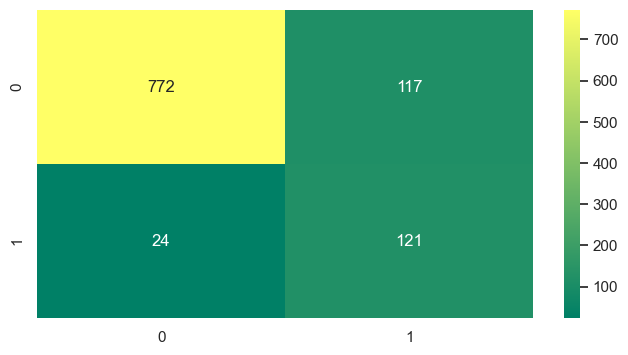

In [51]:
model_prediction(GaussianNB())

Thank You!!!